In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("../../../joined_datasets/joined_rating_dataset.csv")
cleaned_dataset = pd.read_csv("../../../cleaned_datasets/users_details_dataset_cleaned.csv")


Hypotheses 1: 
What is the difference in the genres explored by users of different countries?
- This would help in getting a list of genres to suggest animes from to a user from a partiocular country

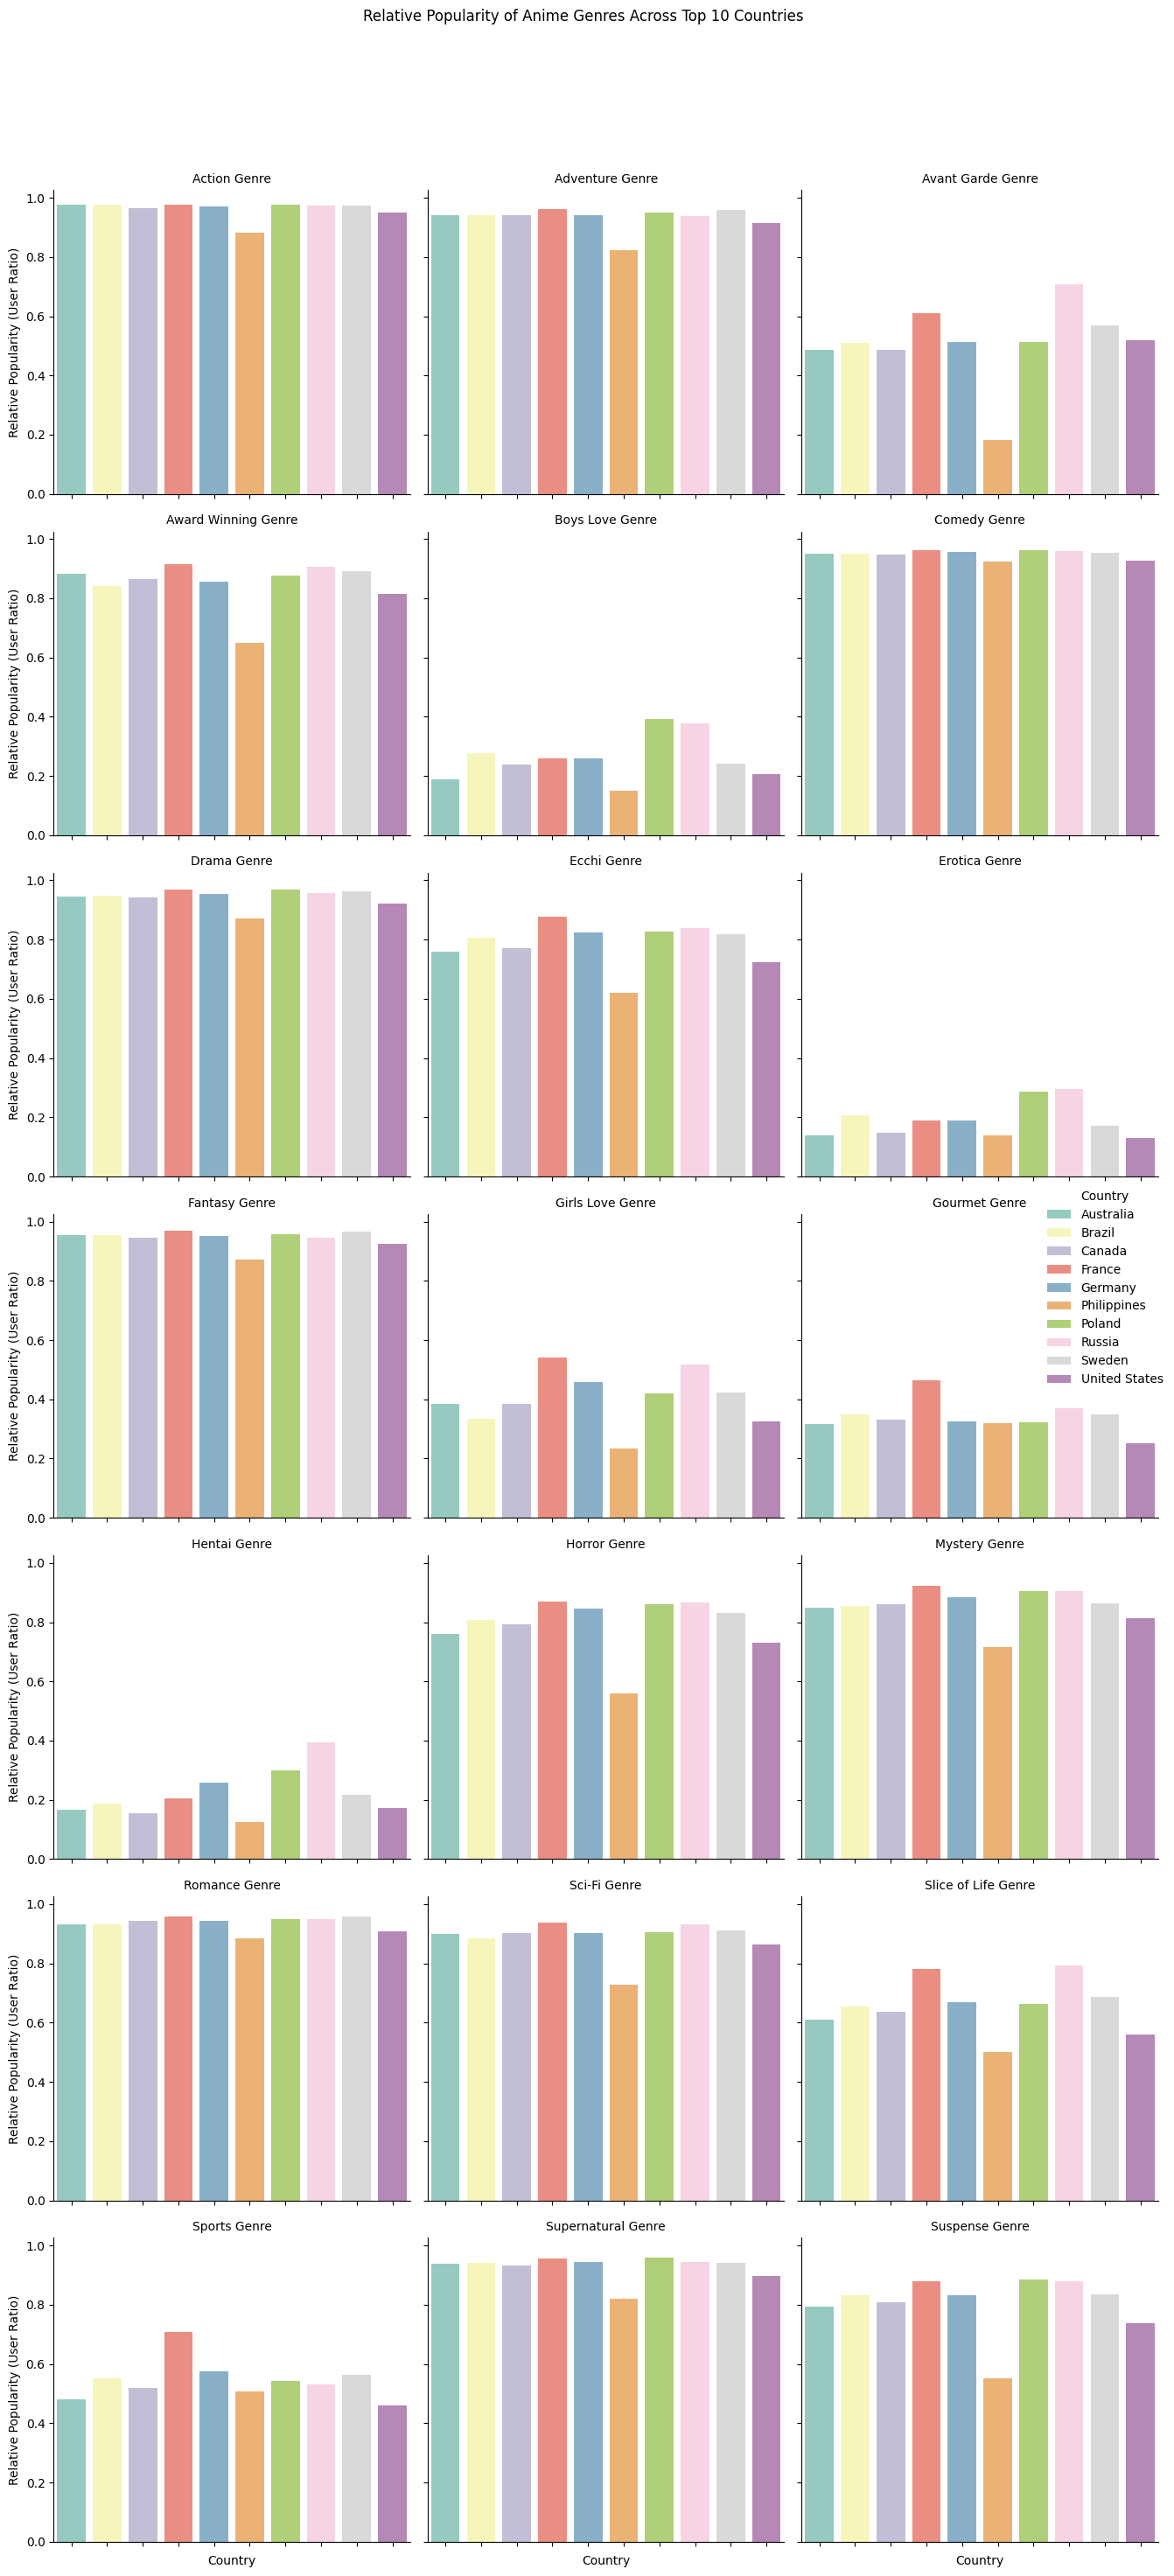

In [10]:
data = dataset.copy()

data['Genres'] = data['Genres'].str.split(', ')

data_exploded = data.explode('Genres')

genre_popularity = data_exploded.groupby(['Location', 'Genres'])['user_id'].nunique().reset_index()
genre_popularity.columns = ['Country', 'Genre', 'User_Count']

country_totals = cleaned_dataset.groupby('Location').size().reset_index()
country_totals.columns = ['Country', 'Total_Users']

genre_popularity = genre_popularity.merge(country_totals, on='Country')

genre_popularity['User_Ratio'] = genre_popularity['User_Count'] / genre_popularity['Total_Users']

top_countries = country_totals.nlargest(10, 'Total_Users')['Country']
top_country_data = genre_popularity[genre_popularity['Country'].isin(top_countries)]


g = sns.catplot(
    data=top_country_data, 
    x='Country', 
    y='User_Ratio', 
    hue='Country', 
    col='Genre', 
    col_wrap=3, 
    kind='bar', 
    height=4, 
    palette='Set3', 
    sharey=True,
    legend=True
)

g.set_titles("{col_name} Genre")
g.set_axis_labels("Country", "Relative Popularity (User Ratio)")
g.set_xticklabels(rotation=45)
g.figure.suptitle('Relative Popularity of Anime Genres Across Top 10 Countries', y=1.05)
plt.tight_layout()
plt.show()

Inference:
1. For different countries the ratio of users who watch mainstream genres like Action, Adventure, Comedy, etc is not varying by much. So these genres can be suggested to most users irrespective of their country.
2. For different countries the ratio of users who watch niche genres like Sports, Slice of Life, Avant Garde is varying by much. So these should only be suggested to users belonging to a country where more people watch this.

Hypotheses 2: 
What is the difference in the genres explored by users of different genders?
- This would help in getting a list of genres to suggest animes from to a user from a partiocular gender

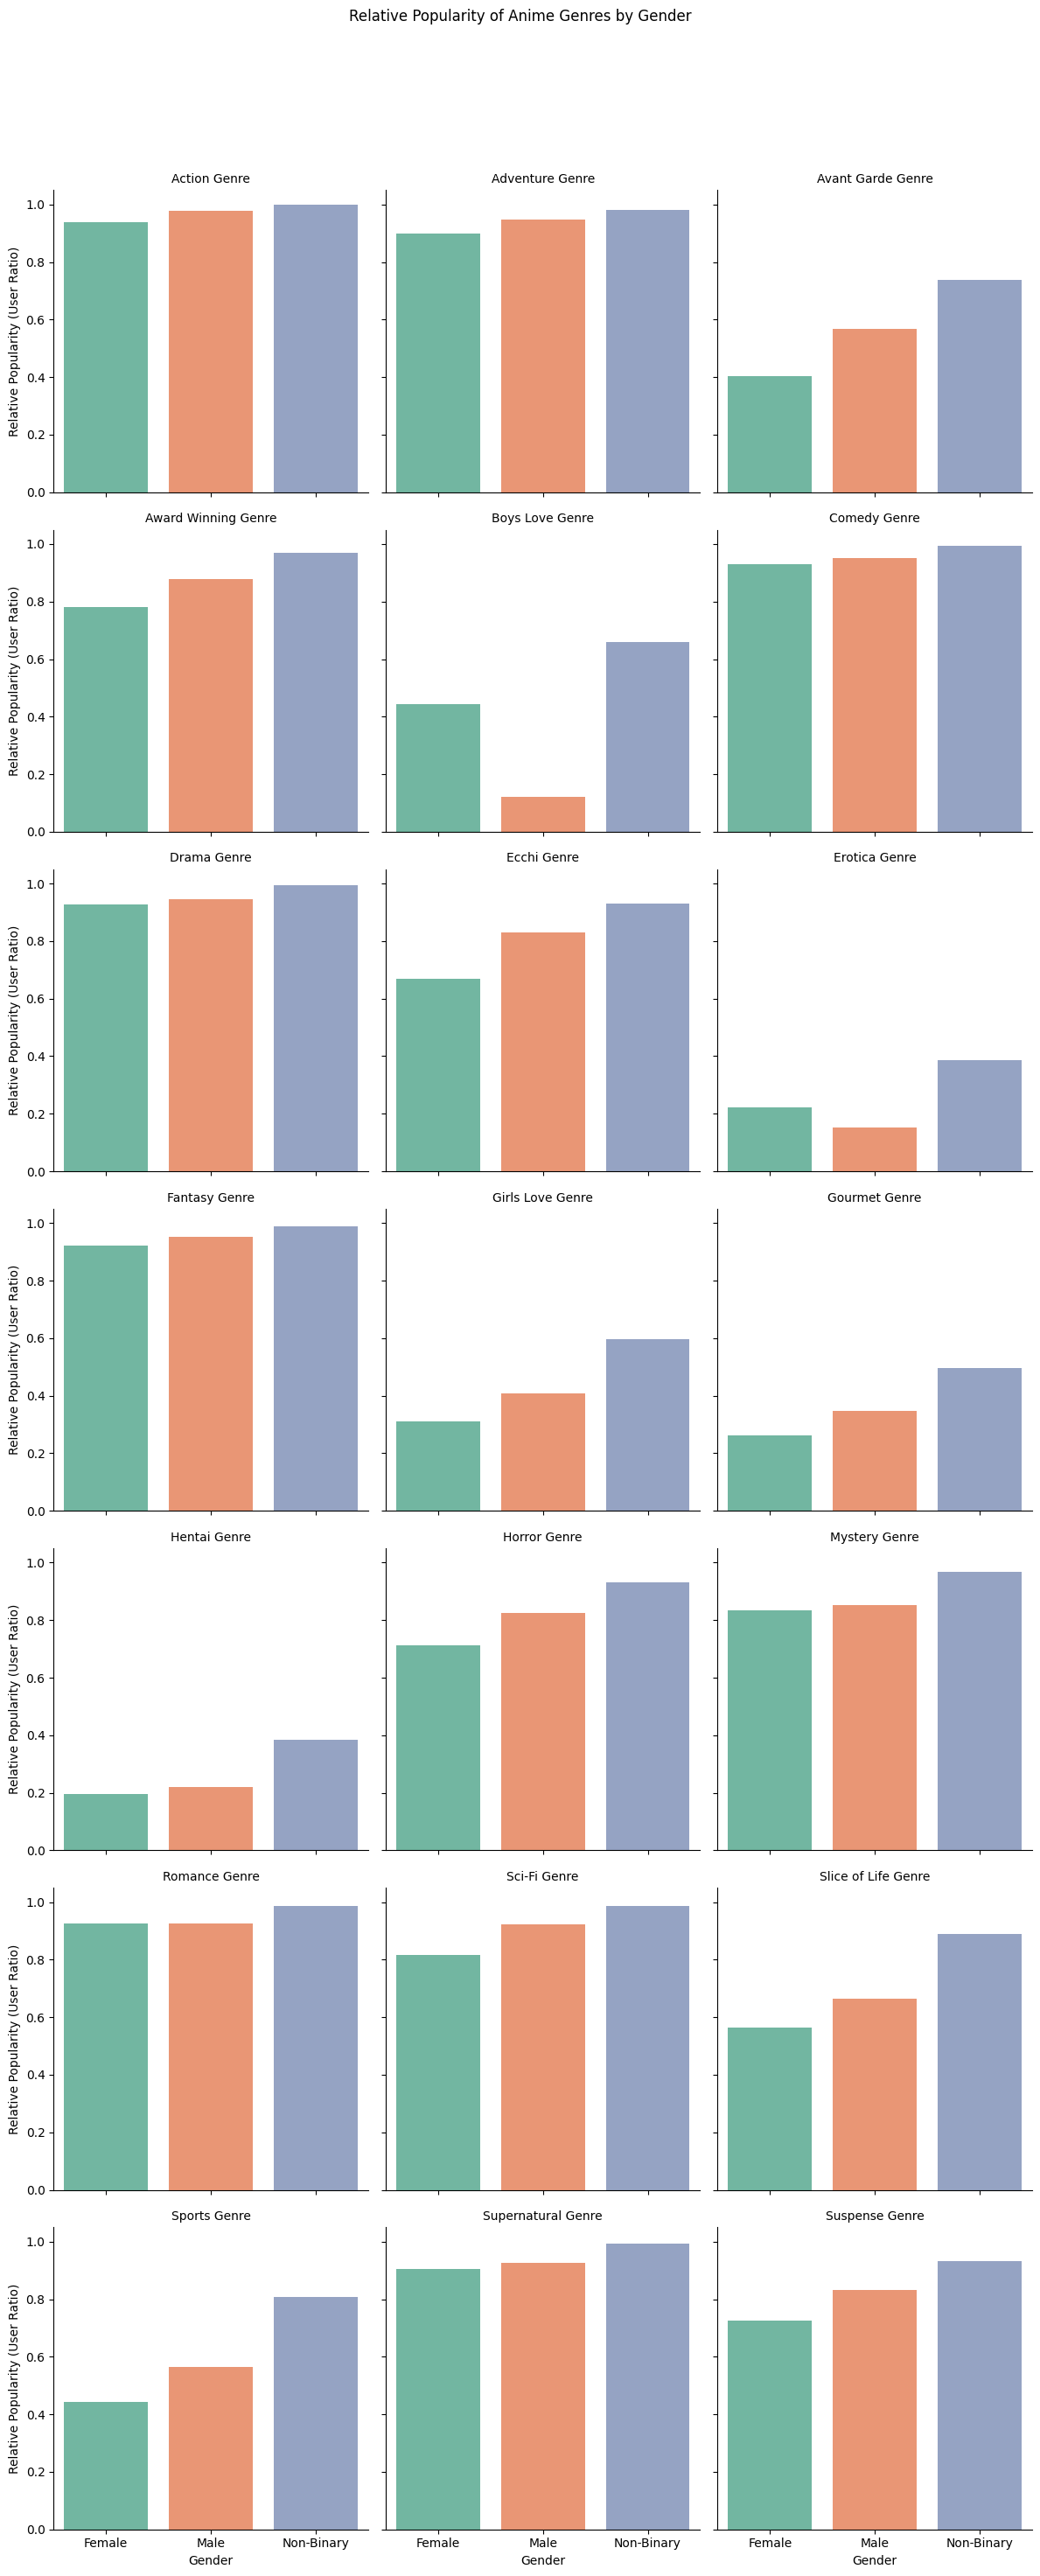

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = dataset.copy()


data['Genres'] = data['Genres'].str.split(', ')


data_exploded = data.explode('Genres')


genre_popularity_gender = data_exploded.groupby(['Gender', 'Genres'])['user_id'].nunique().reset_index()
genre_popularity_gender.columns = ['Gender', 'Genre', 'User_Count']


gender_totals = cleaned_dataset.groupby('Gender').size().reset_index()
gender_totals.columns = ['Gender', 'Total_Users']


genre_popularity_gender = genre_popularity_gender.merge(gender_totals, on='Gender')


genre_popularity_gender['User_Ratio'] = genre_popularity_gender['User_Count'] / genre_popularity_gender['Total_Users']


g = sns.catplot(
    data=genre_popularity_gender, 
    x='Gender', 
    y='User_Ratio', 
    hue='Gender', 
    col='Genre', 
    col_wrap=3, 
    kind='bar', 
    height=4, 
    palette='Set2', 
    sharey=True
)

g.set_titles("{col_name} Genre")
g.set_axis_labels("Gender", "Relative Popularity (User Ratio)")
g.fig.suptitle('Relative Popularity of Anime Genres by Gender', y=1.05)
plt.tight_layout()
plt.show()

Inference

1. For different genders the ratio of users who watch mainstream genres like Action, Adventure, Comedy, etc is not varying by much. So these genres can be suggested to most users irrespective of their gender.
2. For different genders the ratio of users who watch niche genres like Sports, Slice of Life, Avant Garde, Girls love, Boys love is varying by much. So these should only be suggested to users belonging to a gender where more people watch this.